20) Построить нечеткую базу знаний (использовать не менее 3
лингвистических переменных) для задачи определения количества линий в
службе поддержки (учитывать количество обслуживаемых клиентов, среднюю
частоту обращения в службу одного клиента, среднее время обслуживания одной
заявки, квалификацию персонала и т.д.), проверить ее на полноту и произвести
нечеткий вывод для конкретных значений (выбрать случайным образом)

Сформулируем основные зависимости:
- Больше клиентов = больше линий
- Меньше клиентов = меньше линий
- Чаще обращаются = больше линий
- Реже обращаются = меньше линий
- Дольше обработка заявок = больше линий
- Короче обработка заявок = меньше линий
- Выше квалификация персонала = меньше линий
- Ниже квалификация персонала = больше линий

---
Теперь сформулируем правила:

- Если клиентов очень мало, обращаются редко или умеренно, заявки короткие, персонал квалифицированный ИЛИ слабоквалифицированный, ТО линий нужно мало
- Если клиентов мало, обращаются редко, заявки короткие или умеренные, персонал не квалифицированный, ТО линий нужно мало
- Если клиентов мало или умеренно, обращаются редко, заявки долгие или умеренные, персонал квалифицированный, ТО линий нужно мало
- Если клиентов мало, обращаются редко или умеренно, заявки долгие, персонал не квалифицированный или слабоквалифицированный, ТО линий нужно мало
- Если клиентов мало или умеренно, обращаются часто или умеренно, заявки короткие, персонал квалифицированный, ТО линий нужно мало
- Если клиентов мало, обращаются часто, заявки короткие или умеренные, персонал не квалифицированный или слабоквалифицированный, ТО линий нужно умеренно
- Если клиентов мало, обращаются часто или умеренно, заявки долгие, персонал квалифицированный, ТО линий нужно умеренно
- Если клиентов мало, обращаются часто или умеренно, заявки долгие, персонал не квалифицированный или слабоквалифицированный, ТО линий нужно умеренно
- Если клиентов много или умеренно, обращаются редко, заявки короткие или умеренные, персонал квалифицированный, ТО линий нужно умеренно
- Если клиентов много или умеренно, обращаются часто, заявки короткие, персонал не квалифицированный, ТО линий нужно умеренно
- Если клиентов много, обращаются редко, заявки долгие, персонал квалифицированный или слабоквалифицированный, ТО линий нужно умеренно
- Если клиентов много, обращаются редко или умеренно, заявки долгие, персонал не квалифицированный, ТО линий нужно много
- Если клиентов много, обращаются часто, заявки короткие, персонал квалифицированный или слабоквалифицированный, ТО линий нужно много
- Если клиентов много, обращаются часто, заявки короткие или умеренные, персонал не квалифицированный, ТО линий нужно много
- Если клиентов много, обращаются часто, заявки долгие или умеренные, персонал квалифицированный, ТО линий нужно много
- Если клиентов много, обращаются часто или умеренно, заявки очень долгие, персонал не квалифицированный, ТО линий нужно много

Выберем следующие входные переменные (b, T, X, G):
- (кол-во клиентов, {мало, умеренно, много}, [0,100], {ОЧЕНЬ мало, мало ИЛИ умеренно, много ИЛИ умеренно})
- (частота обращений, {редко, умеренно, часто}, [0,10], {редко ИЛИ умеренно, часто ИЛИ умеренно})
- (длительность заявки, {коротко, умеренно, долго}, [0,60], {коротко ИЛИ умеренно, долго ИЛИ умеренно, ОЧЕНЬ долго})
- (квалификация персонала, {неквалифицированный, слабоквалифицированный, квалифицированный}, [0,100], {неквалифицированный ИЛИ слабоквалифицированный, квалифицированный ИЛИ слабоквалифицированный})

Выходная переменная:
(кол-во линий, {мало, умеренно, много}, [0,100], {очень мало, очень много})

---

In [225]:
!pip install scikit-fuzzy

In [226]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# переменные для задачи - колл-центр (кол-во клиентов, кол-во обращений, длительность заявки, квалификация персонала)
clients = ctrl.Antecedent(np.arange(0, 100, 1), 'clients')
calls = ctrl.Antecedent(np.arange(0, 10, 1), 'calls')
call_duration = ctrl.Antecedent(np.arange(0, 60, 1), 'call duration')
qualification = ctrl.Antecedent(np.arange(0, 100, 1), 'qualification')

# выходная переменная - кол-во линий
lines = ctrl.Consequent(np.arange(0, 100, 1), 'lines')


# используем стандартную функцию принадлежности для выходной переменной
lines.automf(names=['few', 'medium', 'many'])


# Определяем границы каждого терма, а термы - для каждой входной переменной 
clients['few'] = fuzz.trapmf(clients.universe, [0, 0, 35, 43])
clients['medium'] = fuzz.trapmf(clients.universe, [42, 53, 66, 70])
clients['many'] = fuzz.trapmf(clients.universe, [69, 81, 100, 100])

calls['few'] = fuzz.trapmf(calls.universe, [0, 0, 1, 2])
calls['medium'] = fuzz.trapmf(calls.universe, [1, 4, 5, 7])
calls['many'] = fuzz.trapmf(calls.universe, [6, 8, 10, 10])

call_duration['short'] = fuzz.trapmf(call_duration.universe, [0, 0, 5, 10])
call_duration['medium'] = fuzz.trapmf(call_duration.universe, [8, 20, 30, 40])
call_duration['long'] = fuzz.trapmf(call_duration.universe, [35, 50, 60, 60])

qualification['low'] = fuzz.trapmf(qualification.universe, [0, 0, 30, 50])
qualification['medium'] = fuzz.trapmf(qualification.universe, [40, 50, 60, 70])
qualification['high'] = fuzz.trapmf(qualification.universe, [60, 80, 100, 100])



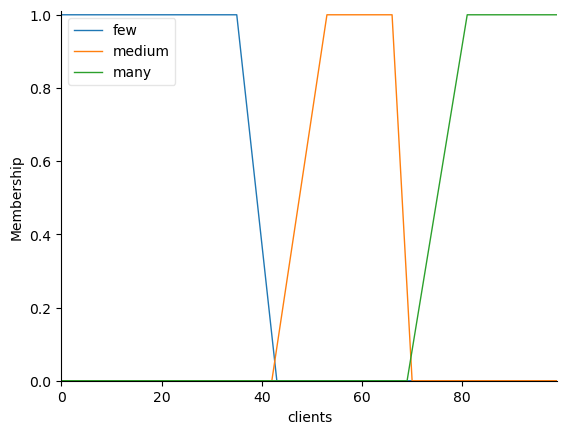

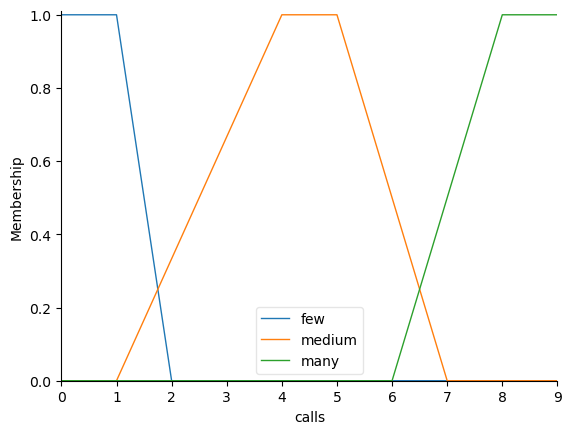

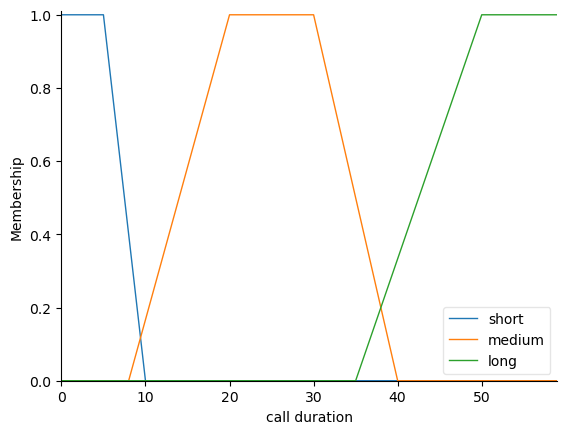

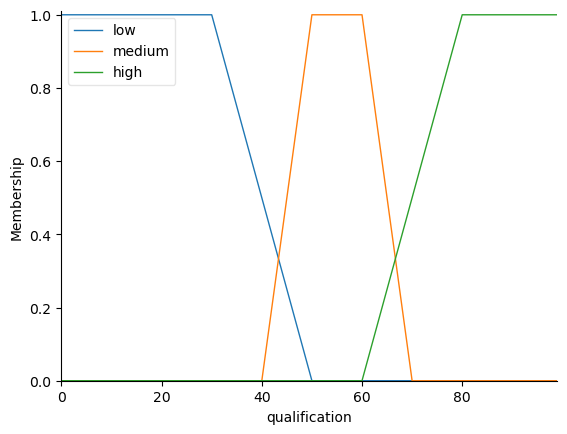

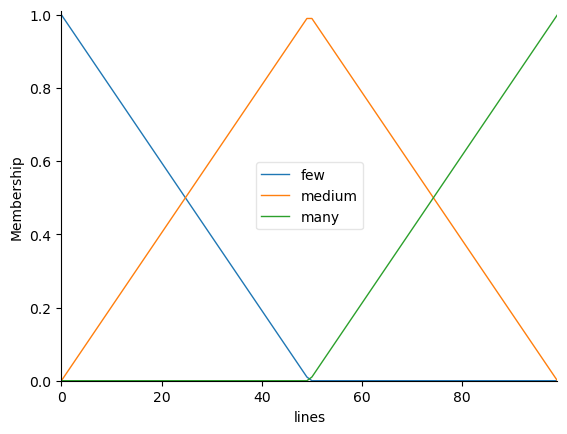

In [227]:
# Вывод графиков границ
clients.view()
calls.view()
call_duration.view()
qualification.view()
lines.view()

In [236]:
# база правил

# Результируют в "мало линий"
rule1 = ctrl.Rule(clients['few'] & (calls['few'] | calls['medium']) & call_duration['short'] & (qualification['high'] | qualification['medium']), lines['few'])
rule2 = ctrl.Rule(clients['medium'] & calls['few'] & (call_duration['short'] | call_duration['medium']) & qualification['low'], lines['few'])
rule3 = ctrl.Rule((clients['few'] | clients['medium']) & calls['few'] & (call_duration['long'] | call_duration['medium']) & qualification['high'], lines['few'])
rule4 = ctrl.Rule(clients['few'] & (calls['few'] | calls['medium']) & call_duration['long'] & (qualification['high'] | qualification['medium']), lines['few'])
rule5 = ctrl.Rule((clients['few'] | clients['medium']) & (calls['few'] | calls['medium']) & call_duration['short'] & qualification['high'], lines['few'])

# Результируют в "умеренно линий"
rule6 = ctrl.Rule(clients['few'] & calls['many'] & (call_duration['short'] | call_duration['medium']) & (qualification['low'] | qualification['medium']), lines['medium'])
rule7 = ctrl.Rule(clients['few'] & (calls['many'] | calls['medium']) & call_duration['medium'] & qualification['high'], lines['medium'])
rule8 = ctrl.Rule(clients['medium'] & (calls['many'] | calls['medium']) & call_duration['long'] & (qualification['low'] | qualification['medium']), lines['medium'])
rule9 = ctrl.Rule((clients['many'] | clients['medium']) & calls['medium'] & (call_duration['short'] | call_duration['medium']) & qualification['medium'], lines['medium'])
rule10 = ctrl.Rule((clients['many'] | clients['medium']) & calls['many'] & call_duration['short'] & qualification['low'], lines['medium'])
rule11 = ctrl.Rule(clients['many'] & calls['few'] & call_duration['long'] & (qualification['high'] | qualification['medium']), lines['medium'])

# Результируют в "много линий"
rule12 = ctrl.Rule(clients['many'] & (calls['few'] | calls['medium']) & call_duration['long'] & qualification['low'], lines['many'])
rule13 = ctrl.Rule(clients['many'] & calls['many'] & call_duration['short'] & (qualification['high'] | qualification['medium']), lines['many'])
rule14 = ctrl.Rule(clients['many'] & calls['many'] & (call_duration['short'] | call_duration['medium']) & qualification['low'], lines['many'])
rule15 = ctrl.Rule(clients['many'] & calls['many'] & (call_duration['long'] | call_duration['medium']) & qualification['high'], lines['many'])
rule16 = ctrl.Rule(clients['medium'] & (calls['many'] | calls['medium']) & call_duration['long'] & qualification['low'], lines['many'])


In [239]:
# Создаём модель на основе правил и симулятор
lines_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, 
                                       rule5, rule6, rule7, rule8,
                                       rule9, rule10, rule11, rule12,
                                       rule13, rule14, rule15, rule16
                                      ])
lines_simulator= ctrl.ControlSystemSimulation(lines_ctrl)


# Входные данные симулятора
lines_simulator.input['clients'] = 30
lines_simulator.input['calls'] = 7
lines_simulator.input['call duration'] = 20
lines_simulator.input['qualification'] = 30

# Высчитываем предположительное выходное значение (кол-во линий)
lines_simulator.compute()
print(lines_simulator.output['lines'])

49.49999999999999


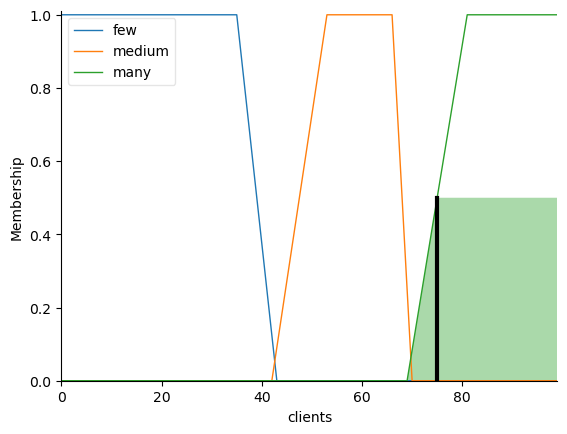

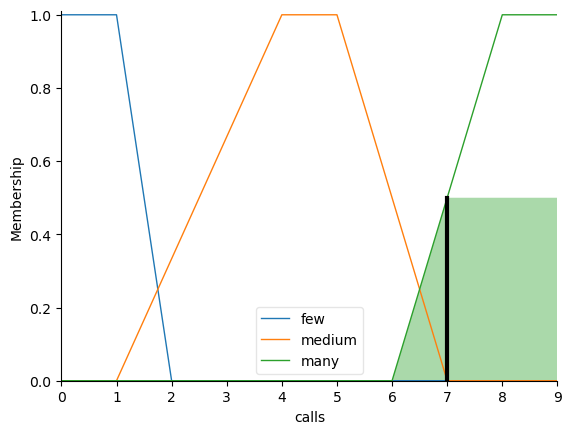

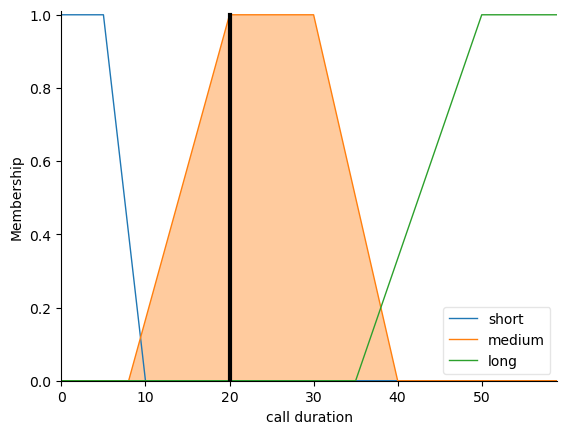

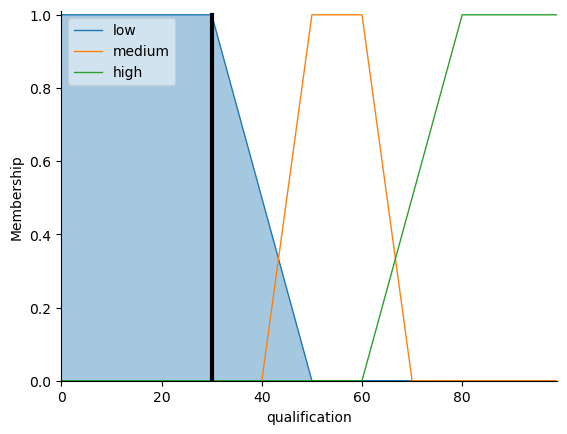

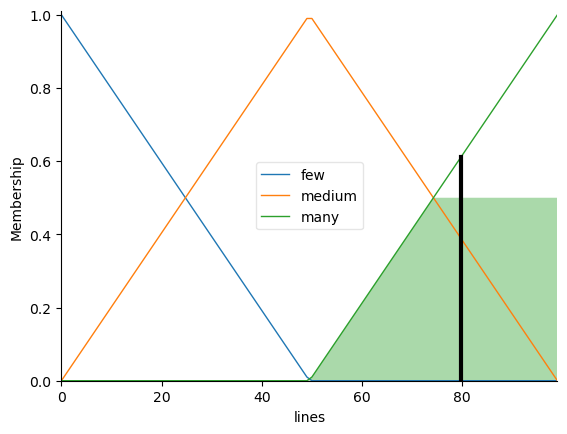

In [224]:
# Вывод новых графиков, основанных на симуляции. Они показывают, к какому терму принадлежат входные данные
clients.view(sim=lines_simulator)
calls.view(sim=lines_simulator)
call_duration.view(sim=lines_simulator)
qualification.view(sim=lines_simulator)

# Аналогичный график для выходной переменной
lines.view(sim=lines_simulator)